In [103]:
import pandas as pd  # import package we need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data.csv') 
#%config InlineBackend.figure_format = 'retina' # high digit graph

In [104]:
df.head() # getting a glance at data 

,sex,age,edu,marital,employ,income,health,bmi,height,weight,exercise,workhour,exemin,fruit,vegetable
0,F,63,4,1,8,3.0,5.0,40.18,1.78,127.01,False,NaN,NaN,False,True
1,F,52,6,2,3,1.0,3.0,25.09,1.73,74.84,True,60.0,168.0,False,False
2,F,71,4,2,7,NaN,4.0,22.04,1.80,71.67,NaN,NaN,NaN,NaN,NaN
3,F,63,4,1,8,8.0,5.0,28.19,1.70,81.65,False,NaN,NaN,True,False
4,F,61,5,1,8,NaN,5.0,24.37,1.63,64.41,False,45.0,NaN,NaN,True


In [105]:
bmi_income = df[['bmi','income']].dropna()  # Picking bmi and income ，and drop those nan value。
bmi_income.head()  # Showing the first 5 data.

,bmi,income
0,40.18,3.0
1,25.09,1.0
3,28.19,8.0
5,26.52,6.0
6,23.89,4.0


In [106]:
bmi_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343092 entries, 0 to 441455
Data columns (total 2 columns):
bmi       343092 non-null float64
income    343092 non-null float64
dtypes: float64(2)
memory usage: 7.9 MB


In [107]:
bmi_rich = bmi_income[bmi_income.income == 8]['bmi'] # the rich 
bmi_ord = bmi_income[bmi_income.income != 8]['bmi'] # the ordinary guys

In [108]:
# using describe() method to get insight view of it
print(bmi_rich.describe())
print(bmi_ord.describe())

count    110259.000000
mean         27.450733
std           5.900353
min          12.050000
25%          23.690000
50%          26.570000
75%          30.040000
max          97.650000
Name: bmi, dtype: float64
count    232833.000000
mean         28.537320
std           6.971436
min          12.020000
25%          24.030000
50%          27.370000
75%          31.620000
max          97.650000
Name: bmi, dtype: float64


In [109]:
mean_rich = bmi_rich.mean()  # Calculating the means 
mean_ord = bmi_ord.mean()
print('BMI mean of rich people: %.2f' % mean_rich)
print('BMI mean of ordinary people: %.2f' % mean_ord)
# it shows the rich have lower bmi

BMI mean of rich people: 27.45
BMI mean of ordinary people: 28.54


In [110]:
median_rich = bmi_rich.median()  # getting the medians
median_ord = bmi_ord.median()
print('BMI median of rich people: %.2f' % median_rich)
print('BMI median of ordinary people: %.2f' % median_ord)
#when mean larger than median, there are some outliners, big figures.

BMI median of rich people: 26.57
BMI median of ordinary people: 27.37


In [111]:
# mode of rich
mode_rich = bmi_rich.mode().iloc[0]
mode_count_rich = np.sum(bmi_rich == mode_rich)
print('BMI mode of rich people: %.2f (counts %d)' % (mode_rich, mode_count_rich))

# mode of ord
mode_ord = bmi_ord.mode().iloc[0]
mode_count_ord = np.sum(bmi_ord == mode_ord)
print('BMI mode of ordinary people: %.2f (counts %d)' % (mode_ord, mode_count_ord))

#Wow !  it is same

BMI mode of rich people: 26.63 (counts 1246)
BMI mode of ordinary people: 26.63 (counts 2766)


In [112]:
# the diff of two group of people
diff = mean_rich - mean_ord 
print('The diff of people: %.2f' % diff)

The diff of people: -1.09


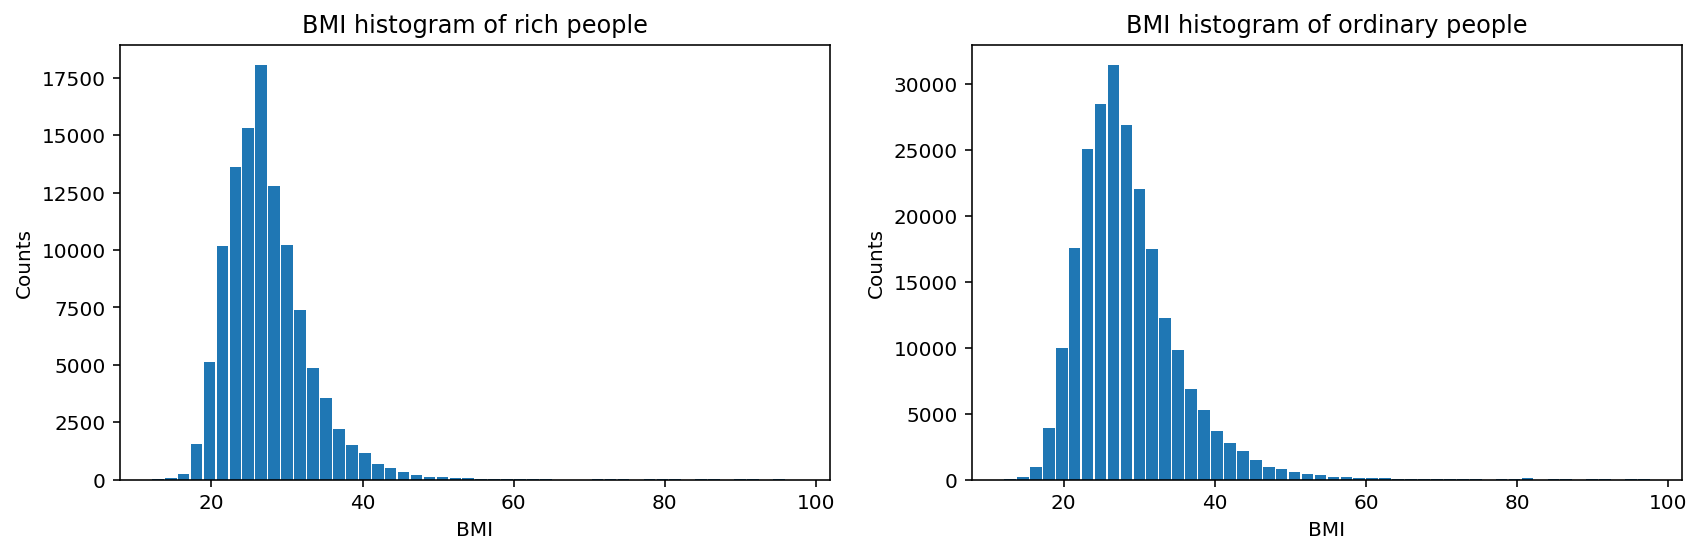

In [113]:
fig = plt.figure(figsize=(14,4))# format of graphes

# Hist of the rich
p1 = fig.add_subplot(121)
plt.hist(bmi_rich, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of rich people')

# Hist of the ord
p2 = fig.add_subplot(122)
plt.hist(bmi_ord, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of ordinary people')

plt.show()


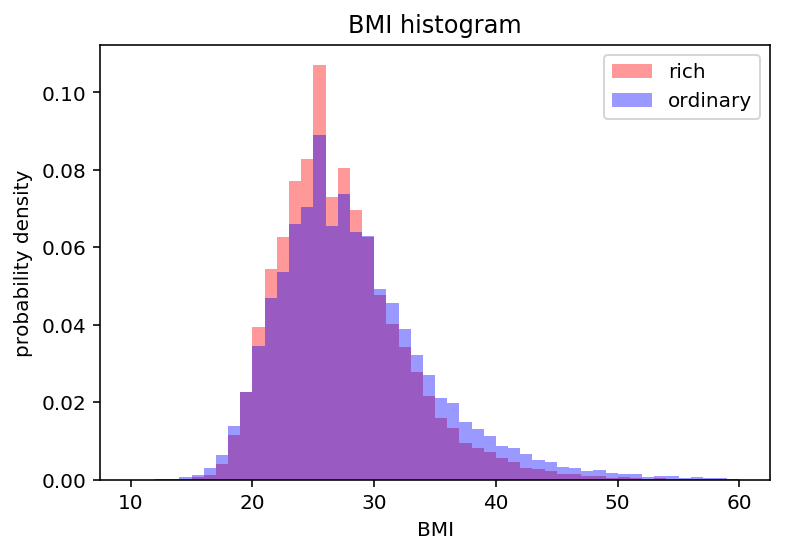

In [114]:
# We overlapping two graphes to find some thing insightful

plt.hist(bmi_rich, bins=50, range=(10,60), density=True, label='rich', alpha=0.4, color='red') # rich for the rich
plt.hist(bmi_ord, bins=50, range=(10,60), density=True, label='ordinary', alpha=0.4, color='blue') # Blue for the ord
plt.legend()
plt.xlabel('BMI')
plt.ylabel('probability density')
plt.title('BMI histogram')
plt.show()
# It seems that rich people tend to have lower BMI

mode range: (25.00, 26.00)
median: 26.57
mean: 27.45
skewness: 2.58


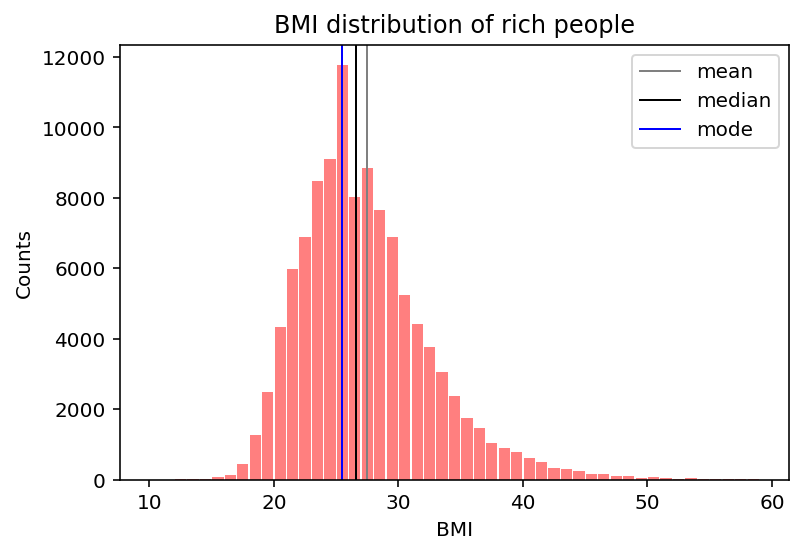

In [115]:
# the Range of Mode, 
bin_edge = np.arange(10,60,1)# from BMI 10 to BMI 60,and deviding into bins by 1
counts, bins = np.histogram(bmi_rich, bin_edge)
mode_left = bins[np.argmax(counts)]
mode_right = bins[np.argmax(counts)+1]
mode_middle = (mode_left + mode_right) / 2 # because the BMI is a continuous data, we cannot get it directly.
print('mode range: (%.2f, %.2f)' % (mode_left, mode_right))
print('median: %.2f' % median_rich)
print('mean: %.2f' % mean_rich)

# Calculating the skewness
print('skewness: %.2f' %bmi_rich.skew()) # positive figure


# showing the mean, median and mode in the hist
plt.axvline(x=mean_rich, linewidth=1, color='gray', label='mean')
plt.axvline(x=median_rich, linewidth=1, color='black', label='median')
plt.axvline(x=mode_middle, linewidth=1, color='blue', label='mode')
plt.legend()# printing out the labels above

plt.hist(bmi_rich, bins=bin_edge, range=(10,60), rwidth=0.9, alpha=0.5,color='red')# showing the hist of rich again.
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI distribution of rich people')
plt.show()


skewness: -0.74


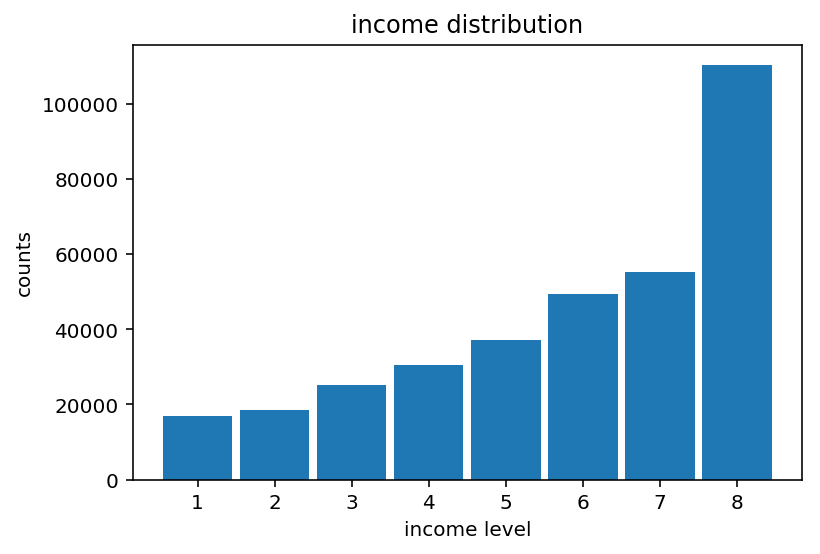

In [116]:
# the distribution of income,
print('skewness: %.2f' %bmi_income.income.skew())

bins = np.arange(1,10)
plt.hist(bmi_income.income, align='left', bins=bins, rwidth=0.9)
plt.title('income distribution')
plt.xlabel('income level')
plt.ylabel('counts')
plt.show()


In [117]:
# Empirical Cumulative Distribution Function, more insightful graphes.
def ecdf(data): # define function to get the x,y
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)



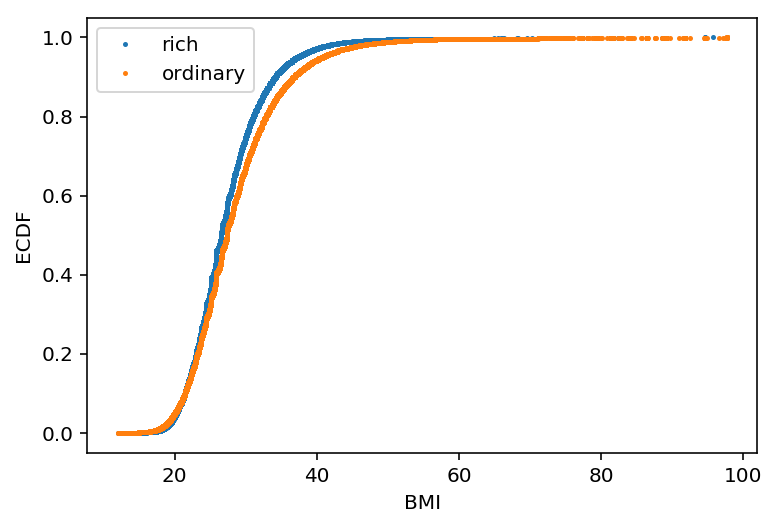

In [118]:
_ = plt.plot(*ecdf(bmi_rich),marker='.', markersize=3, linestyle='none',label='rich')
_ = plt.plot(*ecdf(bmi_ord), marker='.', markersize=3, linestyle='none',label='ordinary')
plt.xlabel('BMI')
plt.ylabel('ECDF')
plt.legend()
plt.show()


In [119]:
# percentile of the rich 
rq1 = bmi_rich.quantile(0.25)
rq2 = bmi_rich.quantile(0.5)
rq3 = bmi_rich.quantile(0.75)
rIQR = rq3 - rq1
print('rich')
print('25%:  ', rq1)
print('50%:  ', rq2)
print('75%:  ', rq3)
print('IQR:   %.2f' % rIQR)

print('_______________________')
print(' ')
# percentile of the rich 
oq1 = bmi_rich.quantile(0.25)
oq2 = bmi_rich.quantile(0.5)
oq3 = bmi_rich.quantile(0.75)
oIQR = oq3 - oq1
print('Ordinary')
print('25%:  ', oq1)
print('50%:  ', oq2)
print('75%:  ', oq3)
print('IQR:   %.2f' % oIQR)

rich
25%:   23.69
50%:   26.57
75%:   30.04
IQR:   6.35
_______________________
 
Ordinary
25%:   23.69
50%:   26.57
75%:   30.04
IQR:   6.35


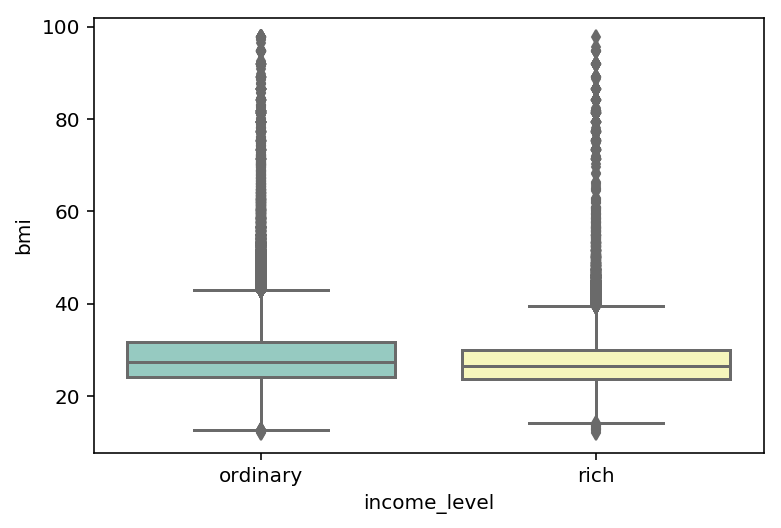

In [120]:
# Boxplot
#1
bmi_income['income_level'] = bmi_income.income.apply(lambda x: 'rich' if x==8 else 'ordinary')
#or using replace in dataframe and astype method to set two categories 
sns.boxplot(x='income_level', y='bmi', data=bmi_income, palette="Set3")
plt.show()

In [121]:
# PS : var = s **2
var_rich = bmi_rich.var()
std_rich = bmi_rich.std()
print(' For rich people: Variance = %.2f, Standard deviation = %.2f' % (var_rich, std_rich))

var_ord = bmi_ord.var()
std_ord = bmi_ord.std()
print(' For ordinary people: Variance = %.2f, Standard deviation = %.2f' % (var_ord, std_ord))


 For rich people: Variance = 34.81, Standard deviation = 5.90
 For ordinary people: Variance = 48.60, Standard deviation = 6.97


In [122]:
def cohen_d(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    sp = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))
    return abs((x1-x2)/sp)

print("Cohen's d: %.3f" %cohen_d(bmi_rich, bmi_ord))
# 1 means really different and 0.5 means median level.

Cohen's d: 0.163


In [123]:
# Calculating Cov
df2 = df[['height','weight', 'bmi' ]].dropna()  #getting height, weight and BMI to build a new dataframe df2
height = df2.height
weight = df2.weight
bmi = df2.bmi

np.cov(height,weight)


array([[1.12563400e-02, 1.08190764e+00],
       [1.08190764e+00, 4.67153513e+02]])

In [124]:
# Calculating Pearson_r
# the value ranges from -1 to 1 , when it approches to 0, there is no correlation between two variables.
corr_hw = np.corrcoef(height, weight)[0,1]
print('Pearson correlation coefficient: %.4f' % corr_hw )
#And positive figures, showing the positive relationship 

Pearson correlation coefficient: 0.4718


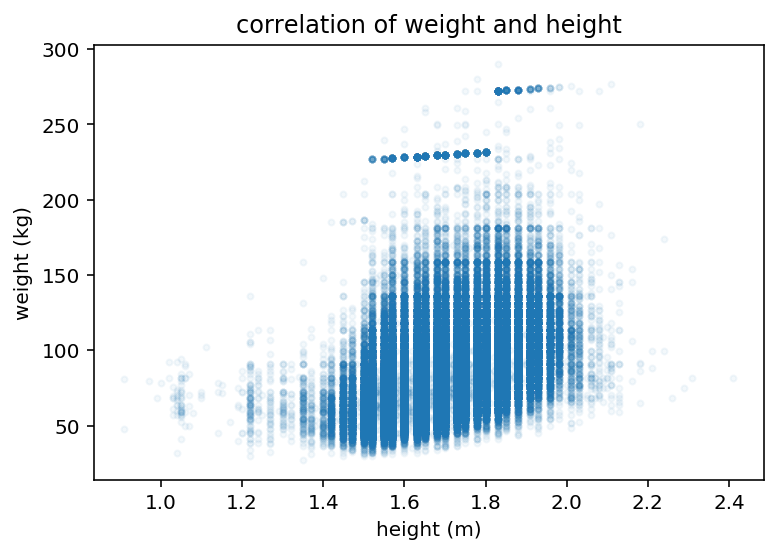

In [125]:
#scatter graph shows the distribution
plt.plot(height,weight, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('weight (kg)')
plt.title('correlation of weight and height')
plt.show()

Pearson correlation coefficient: 0.87


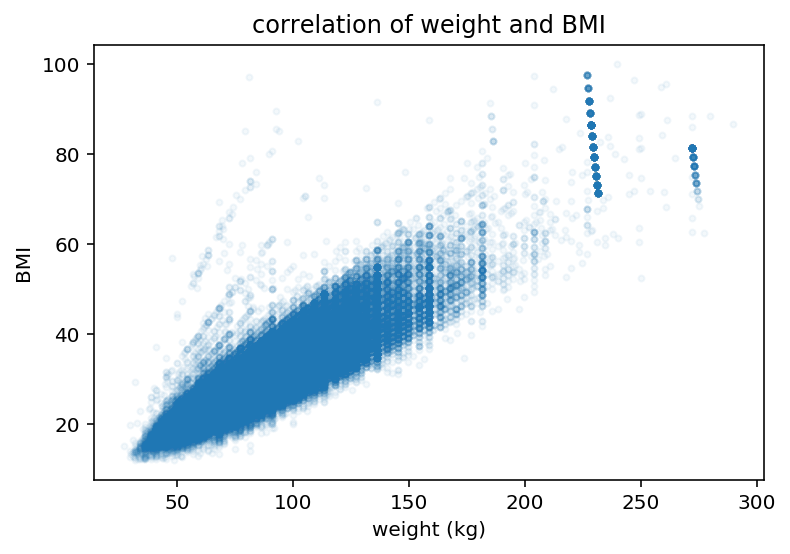

In [126]:
# corr between BMI and weight
corr_bw = np.corrcoef(weight, bmi)
print('Pearson correlation coefficient: %.2f' % corr_bw[0,1] )
#stronger relationship than weight and height


# Scatter
plt.plot(weight,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('weight (kg)')
plt.ylabel('BMI')
plt.title('correlation of weight and BMI')
plt.show()

#thiner graph

Pearson correlation coefficient: -0.0060


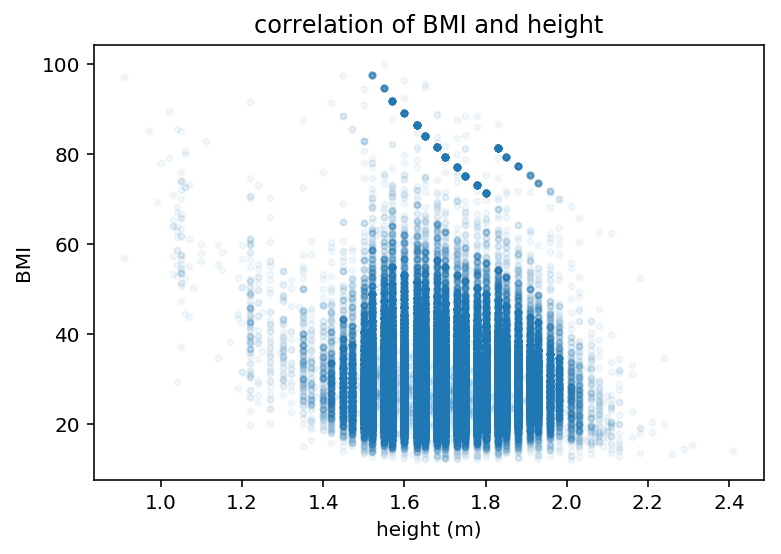

In [127]:
# BMI and 
corr_bh = np.corrcoef(height, bmi)
print('Pearson correlation coefficient: %.4f' % corr_bh[0,1] )

# Scacatter
plt.plot(height,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('BMI')
plt.title('correlation of BMI and height')
plt.show()
#Showing that there are little relationship between height and BMI!!!